In [1]:
import random
import mne, os, glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib qt 

In [2]:
""" 
create data path
"""
# Create data paths 
data_directory = 'C:/Users/mvmigem/Documents/data/project_1/early_pilot/'
eeg_file_path = data_directory + 'Gilles.bdf'
clean_eeg_path = data_directory + 'gilles_clean-epo.fif'
mastoid_clean_eeg_path = data_directory + 'gilles_clean_mastoidref-epo.fif'



behav_file_path1 = data_directory + 'pilot_predatt_participant_00.csv'
behav_file_path2 = data_directory + 'pilot_predatt_participant_01.csv'
behav_file_path3 = data_directory + 'pilot_predatt_participant_01b.csv'

epochs = mne.read_epochs(mastoid_clean_eeg_path)
ep_mastoid = mne.read_epochs(mastoid_clean_eeg_path)
raw = mne.io.read_raw_bdf(eeg_file_path, preload = True)

meta_data_1 = pd.read_csv(behav_file_path1)
meta_data_2 = pd.read_csv(behav_file_path2)
meta_data_3 = pd.read_csv(behav_file_path3)
pp = 1

Reading C:\Users\mvmigem\Documents\data\project_1\early_pilot\gilles_clean_mastoidref-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     300.78 ms
        0 CTF compensation matrices available
Not setting metadata
4467 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\mvmigem\Documents\data\project_1\early_pilot\gilles_clean_mastoidref-epo.fif ...
    Found the data of interest:
        t =     -97.66 ...     300.78 ms
        0 CTF compensation matrices available
Not setting metadata
4467 matching events found
No baseline correction applied
0 projection items activated
Extracting EDF parameters from C:\Users\mvmigem\Documents\data\project_1\early_pilot\Gilles.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1451519  =      0.000 ...  2834.998 secs...


In [3]:
events_raw = mne.find_events(raw=raw)

Trigger channel has a non-zero initial value of 4 (consider using initial_event=True to detect this event)
4469 events found
Event IDs: [   11    12    13    14    21    22    23    24    31    32    33    34
    41    42    43    44    99 65536]


In [4]:
lost_trial = []
lost_trial.append(np.where(events_raw== 99)[0][743])
lost_trial.append(np.where(events_raw== 99)[0][743]+1)
epochs.drop(lost_trial)

In [6]:
meta_data_3['fix_dist'], meta_data_3['stim_size'] = meta_data_3['stim_size'].copy(), meta_data_3['fix_dist'].copy()
meta_data = pd.concat([meta_data_1,meta_data_2,meta_data_3],axis=0)

In [8]:
catch_epochs_list =[]
catch_trials = list(np.where(meta_data.catch_trial != 0)[0])
for i in catch_trials:
    trial_stamp = np.where(events_raw== 99)[0][i]
    catch_epochs_list.append(trial_stamp)
    for j in range(4):
        stim_stamp = trial_stamp + j +1
        catch_epochs_list.append(stim_stamp)


In [27]:
cond1_epochs_list =[]
cond1_trials = list(np.where(meta_data.last_position ==3)[0])
# cond1_trials = random.sample(cond1_trials,int(len(cond2_trials)))
for i in cond1_trials:
    trial_stamp = np.where(events_raw== 99)[0][i]
    cond1_epochs_list.append(trial_stamp)
    for j in range(4):
        stim_stamp = trial_stamp + j +1
        cond1_epochs_list.append(stim_stamp)

cond1_list = [ind for ind in cond1_epochs_list if ind not in catch_epochs_list]

In [17]:
cond2_epochs_list =[]
cond2_trials = list(np.where(meta_data.last_position !=3)[0])
for i in cond2_trials:
    trial_stamp = np.where(events_raw== 99)[0][i]
    cond2_epochs_list.append(trial_stamp)
    for j in range(4):
        stim_stamp = trial_stamp + j +1
        cond2_epochs_list.append(stim_stamp)

cond2_list = [ind for ind in cond2_epochs_list if ind not in catch_epochs_list]

In [ ]:
cond3_epochs_list =[]
cond3_trials = list(np.where(meta_data.stim_size == 8)[0])
for i in cond3_trials:
    trial_stamp = np.where(events_raw== 99)[0][i]
    cond3_epochs_list.append(trial_stamp)
    for j in range(4):
        stim_stamp = trial_stamp + j +1
        cond3_epochs_list.append(stim_stamp)

cond3_list = [ind for ind in cond3_epochs_list if ind not in catch_epochs_list]

In [ ]:
low_spat_freq_epochs = epochs[cond1_list]
mid_spat_freq_epochs = epochs[cond2_list]
high_spat_freq_epochs = epochs[cond3_list]

In [ ]:
low_size_epochs = epochs[cond2_list]
mid_size_epochs = epochs[cond1_list]
high_size_epochs = epochs[cond3_list]

In [ ]:
close_fixation_epochs = epochs[cond1_list]
mid_fixation_epochs = epochs[cond2_list]
far_fixation_epochs = epochs[cond3_list]
first_exp_epoch = epochs[:2252]

In [28]:
predicted_epochs = epochs[cond1_list]
unpred_epochs = epochs[cond2_list]


In [ ]:
evoked_pos1 = low_size_epochs['pos1'].average()
evoked_pos2 = low_size_epochs['pos2'].average()
evoked_pos3 = low_size_epochs['pos3'].average()
evoked_pos4 = low_size_epochs['pos4'].average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('pos1','pos2','pos3','pos4')
low_size = dict(zip(conds, evokeds_list))

In [ ]:
evoked_pos1 = mid_size_epochs['pos1'].average()
evoked_pos2 = mid_size_epochs['pos2'].average()
evoked_pos3 = mid_size_epochs['pos3'].average()
evoked_pos4 = mid_size_epochs['pos4'].average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('pos1','pos2','pos3','pos4')
mid_size = dict(zip(conds, evokeds_list))

In [20]:
evoked_pos1 = unpred_epochs['pos1/seq4'].average()
evoked_pos2 = unpred_epochs['pos2/seq4'].average()
evoked_pos3 = unpred_epochs['pos3/seq4'].average()
evoked_pos4 = unpred_epochs['pos4/seq4'].average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('pos1','pos2','pos3','pos4')
unpredicted = dict(zip(conds, evokeds_list))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [21]:
evoked_pos1 = predicted_epochs['pos1/seq4'].average()
evoked_pos2 = predicted_epochs['pos2/seq4'].average()
evoked_pos3 = predicted_epochs['pos3/seq4'].average()
evoked_pos4 = predicted_epochs['pos4/seq4'].average()

evokeds_list = [evoked_pos1,evoked_pos2,evoked_pos3,evoked_pos4]
conds = ('pos1','pos2','pos3','pos4')
predicted = dict(zip(conds, evokeds_list))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [25]:
epoch_set1 = predicted
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'A19', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'A21', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(epoch_set1, picks= 'A23', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))

[<Figure size 800x600 with 2 Axes>]

In [26]:
epoch_set2 = unpredicted
mne.viz.plot_compare_evokeds(epoch_set2, picks= 'A19', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(epoch_set2, picks= 'A21', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(epoch_set2, picks= 'A23', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))

[<Figure size 800x600 with 2 Axes>]

In [ ]:
mne.viz.plot_compare_evokeds(high_size, picks= 'A5', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(high_size, picks= 'A19', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(high_size, picks= 'A32', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))

In [ ]:
mne.viz.plot_compare_evokeds(first_trial, picks= 'A5', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(first_trial, picks= 'A19', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))
mne.viz.plot_compare_evokeds(first_trial, picks= 'A32', vlines=[0.05,0.1],ylim=dict(eeg=[-6, 6]))

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


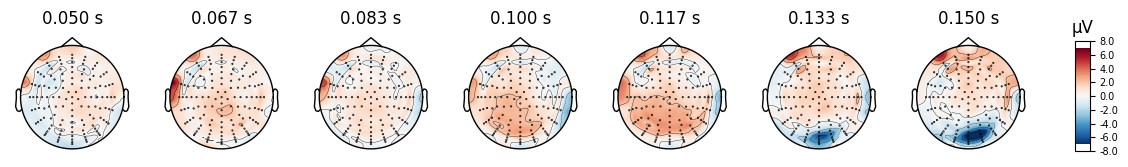

In [32]:
times = np.linspace(0.05, 0.15, 7)

predicted_epochs['pos4/seq1'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=(-7, 7))
predicted_epochs['pos4/seq2'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=(-7, 7))
predicted_epochs['pos4/seq3'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=(-7, 7))
predicted_epochs['pos4/seq4'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=(-7, 7))


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


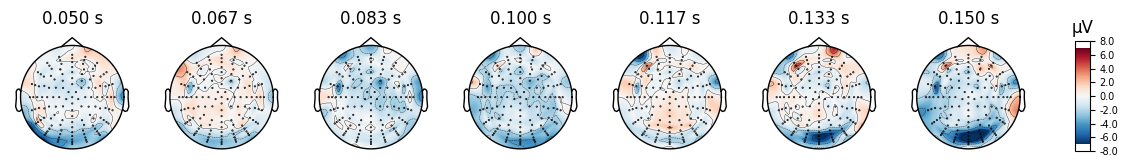

In [24]:
times = np.linspace(0.05, 0.15, 7)

unpred_epochs['pos1/seq4'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=(-7, 7))
unpred_epochs['pos2/seq4'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=(-7, 7))
unpred_epochs['pos3/seq4'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=(-7, 7))
unpred_epochs['pos4/seq4'].average().plot_topomap(ch_type="eeg", times=times, colorbar=True, vlim=(-7, 7))


In [ ]:
np.where(meta_data.fix_dist == 8)

In [ ]:
np.where(meta_data.catch_trial != 0)

In [ ]:
pd_pred_pos1 = predicted_epochs['pos1/seq4'].average().to_data_frame().drop('time',axis=1)
pd_pred_pos2 = predicted_epochs['pos2/seq4'].average().to_data_frame().drop('time',axis=1)
pd_pred_pos3 = predicted_epochs['pos3/seq4'].average().to_data_frame().drop('time',axis=1)
pd_pred_pos4 = predicted_epochs['pos4/seq4'].average().to_data_frame().drop('time',axis=1)


In [ ]:
pd_unpred_pos1 = unpred_epochs['pos1/seq4'].average().to_data_frame().drop('time',axis=1)
pd_unpred_pos2 = unpred_epochs['pos2/seq4'].average().to_data_frame().drop('time',axis=1)
pd_unpred_pos3 = unpred_epochs['pos3/seq4'].average().to_data_frame().drop('time',axis=1)
pd_unpred_pos4 = unpred_epochs['pos4/seq4'].average().to_data_frame().drop('time',axis=1)

In [ ]:
np_pred_pos1 = pd_pred_pos1.to_numpy()
np_pred_pos2 = pd_pred_pos2.to_numpy()
np_pred_pos3 = pd_pred_pos3.to_numpy()
np_pred_pos4 = pd_pred_pos4.to_numpy()

In [ ]:
np_unpred_pos1 = pd_unpred_pos1.to_numpy()
np_unpred_pos2 = pd_unpred_pos2.to_numpy()
np_unpred_pos3 = pd_unpred_pos3.to_numpy()
np_unpred_pos4 = pd_unpred_pos4.to_numpy()

In [ ]:
np.savetxt(data_directory+'pred_pos1.ep',np_pred_pos1,delimiter='\t')
np.savetxt(data_directory+'pred_pos2.ep',np_pred_pos2,delimiter='\t')
np.savetxt(data_directory+'pred_pos3.ep',np_pred_pos3,delimiter='\t')
np.savetxt(data_directory+'pred_pos4.ep',np_pred_pos4,delimiter='\t')

In [ ]:
np.savetxt(data_directory+'unpred_pos1.ep',np_unpred_pos1,delimiter='\t')
np.savetxt(data_directory+'unpred_pos2.ep',np_unpred_pos2,delimiter='\t')
np.savetxt(data_directory+'unpred_pos3.ep',np_unpred_pos3,delimiter='\t')
np.savetxt(data_directory+'unpred_pos4.ep',np_unpred_pos4,delimiter='\t')

In [ ]:
times = np.arange(0.05, 0.151, 0.01)
fig, anim = unpredicted[0].animate_topomap(times=times, ch_type="eeg", frame_rate=2, blit=False)